In [2]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# Salary Ranges Dataset:

In [5]:
# load in the data set
salary_ranges = pd.read_csv('Salary_Ranges_by_Job_Classification.csv')

In [6]:
# view the first few rows and the headers
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [7]:
# get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [8]:
# another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [9]:
# Basic Value Counts of the Grade column
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
06870     9
07420     9
Name: Grade, dtype: int64

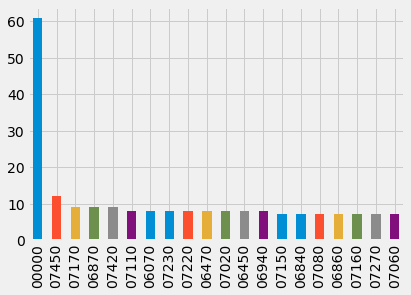

In [10]:
# Bar Chart of the Grade column
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

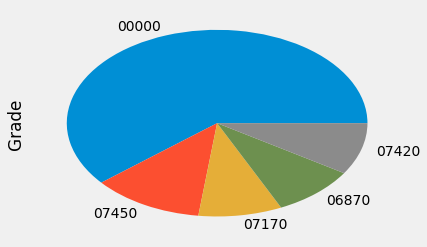

In [13]:
# Bar Chart of the Grade column as a pie chart (top 5 values only)
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

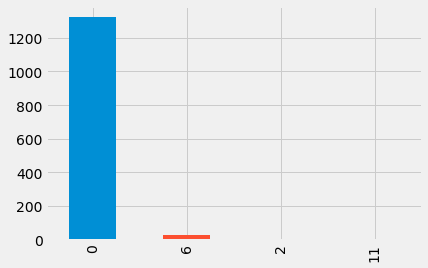

In [14]:
salary_ranges['Extended Step'].value_counts().plot(kind='bar')

In [15]:
# show descriptive stats:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [16]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head(5)

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [17]:
# Rate has dollar signs in a few of them, we need to clean that up..
salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [18]:
# need to clean our Biweekly High columns to remove the dollar sign in order to visualize
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))

In [19]:
# Check to see the '$' has been removed
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [20]:
# Convert the Biweeky columns to float
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

In [21]:
# Convert the Grade columns to str
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [22]:
# check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [29]:
   1,356 rows (like we started with)
    Two columns (that we selected):
        Biweekly High Rate: A quantitative column that refers to the average high weekly salary for a specified department:
            This column is quantitative because the the values are numerical in nature and describe the quantity of money that the person earns weekly
            It is of type float, which we cast it to
        Grade: The department that the salary is in reference to:
            This column is definitely qualitative because the codes refer to a department and not a quantity of any kind
            It is of type object, which is the type pandas will stipulate if it is a string

IndentationError: unexpected indent (<ipython-input-29-8e264547696e>, line 2)

In [25]:
salary_ranges.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


Text(0.5,1,'Top 20 Grade by Mean Biweekly High Rate')

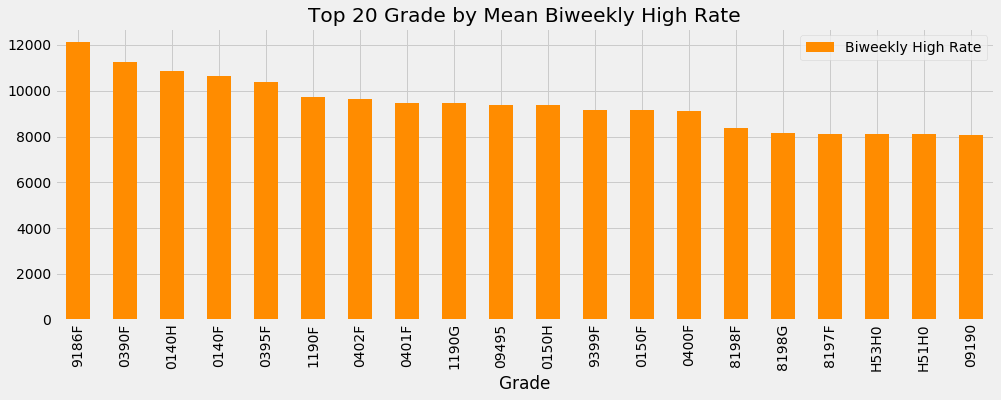

In [33]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5,1,'Bottom 20 Grade by Mean Biweekly High Rate')

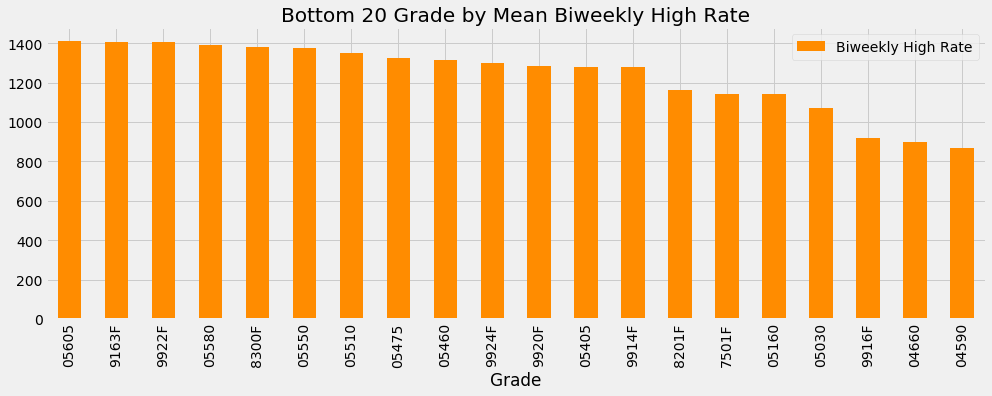

In [34]:
# Which Grade has the lowest Biweekly high rate

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [38]:
#Because money is at the ratio level, we can also find the ratio of the highest-paid employee to the lowest-paid employee:
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False)
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]
#The highest-paid employee makes 14x the lowest city employee. Thanks, ratio level!


13.931919540229886

# Further plotting: 

Only using Biweekly High rate since they are the same as Low rate

# SFO Customer Survey Dataset:

In [39]:
# load in the data set
#https://data.sfgov.org/Transportation/2013-SFO-Customer-Survey/mjr8-p6m5
customer = pd.read_csv('2013_SFO_Customer_survey.csv')

In [40]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [41]:
customer.shape

(3535, 95)

In [42]:
art_ratings = customer['Q7A_ART']

In [43]:
art_ratings.describe()  # it considers the ratings numerical, so let's cast them as a string because we know that they are ordinal

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [44]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]

In [45]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

In [46]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

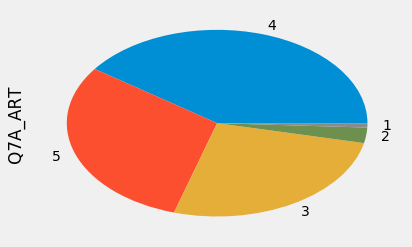

In [47]:
# Can use pie charts, just like in nominal level
art_ratings.value_counts().plot(kind='pie')

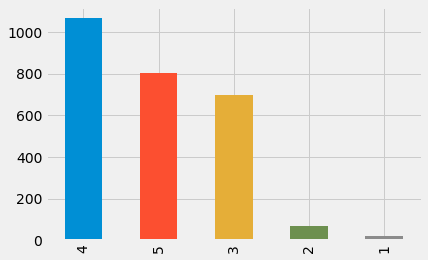

In [48]:
# Can use bar charts, just like in nominal level
art_ratings.value_counts().plot(kind='bar')

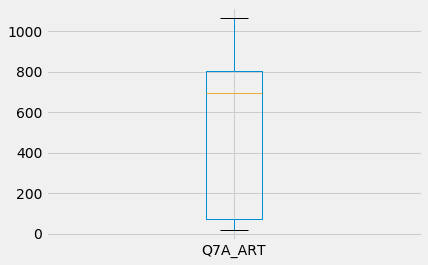

In [49]:
# Boxplots are available at the ordinal level
art_ratings.value_counts().plot(kind='box')

In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [51]:
customer.isnull().sum()

RESPNUM               0
CCGID                 0
RUN                   0
INTDATE               0
GATE                  0
STRATA                0
PEAK                  0
METHOD                0
AIRLINE               0
FLIGHT                0
DEST                  0
DESTGEO               0
DESTMARK              0
ARRTIME               0
DEPTIME               0
Q2PURP1               0
Q2PURP2              76
Q2PURP3            3372
Q2PURP4            3518
Q2PURP5            3533
Q2PURP6            3535
Q3GETTO1              0
Q3GETTO2             30
Q3GETTO3           3518
Q3GETTO4           3534
Q3GETTO5           3535
Q3GETTO6           3535
Q3PARK             3251
Q4BAGS                0
Q4BUY                 0
                   ... 
Q10COM3            3521
Q11A_USEWEB           0
Q11B_USESFOAPP        0
Q11C_USEOTHAPP        0
Q11D_USESOCMED        0
Q11E_USEWIFI          0
Q12COM1            2829
Q12COM2            3460
Q12COM3            3533
Q13_WHEREDEPART       0
Q13_RATEGETTO   

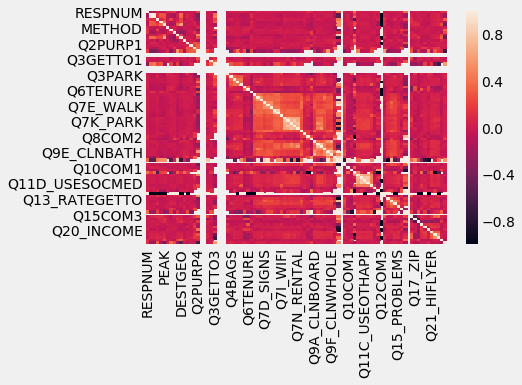

In [52]:
sns.heatmap(customer.corr())

In [135]:
# we see that there are quite a few null values, so let's discuss methods for handling missing data
# other methods to handle missing data, (called imputing): 
# using the mean of the column for the missing values,
# utilizing machine learning methods to fill in the data

In [53]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [54]:
customer.isnull().sum()

RESPNUM            0
CCGID              0
RUN                0
INTDATE            0
GATE               0
STRATA             0
PEAK               0
METHOD             0
AIRLINE            0
FLIGHT             0
DEST               0
DESTGEO            0
DESTMARK           0
ARRTIME            0
DEPTIME            0
Q2PURP1            0
Q3GETTO1           0
Q4BAGS             0
Q4BUY              0
Q4FOOD             0
Q4WIFI             0
Q5FLYPERYR         0
Q6TENURE           0
SAQ                0
Q7A_ART            0
Q7B_FOOD           0
Q7C_SHOPS          0
Q7D_SIGNS          0
Q7E_WALK           0
Q7F_SCREENS        0
                  ..
Q7M_LTPARK         0
Q7N_RENTAL         0
Q7O_WHOLE          0
Q9A_CLNBOARD       0
Q9B_CLNAIRTRAIN    0
Q9C_CLNRENT        0
Q9D_CLNFOOD        0
Q9E_CLNBATH        0
Q9F_CLNWHOLE       0
Q10SAFE            0
Q11A_USEWEB        0
Q11B_USESFOAPP     0
Q11C_USEOTHAPP     0
Q11D_USESOCMED     0
Q11E_USEWIFI       0
Q13_WHEREDEPART    0
Q13_RATEGETTO

In [55]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

In [56]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
PEAK,3535.0,2.117115,0.767092,1.000000,2.000000,2.000000,3.000000,3.000000
METHOD,3535.0,1.011315,0.115993,1.000000,1.000000,1.000000,1.000000,3.000000
AIRLINE,3535.0,23.683734,11.515232,2.000000,14.000000,29.000000,33.000000,38.000000
FLIGHT,3535.0,1187.998868,1407.551713,1.000000,387.000000,758.000000,1404.000000,6455.000000
DEST,3535.0,57.254597,30.339705,2.000000,32.000000,55.000000,88.000000,106.000000


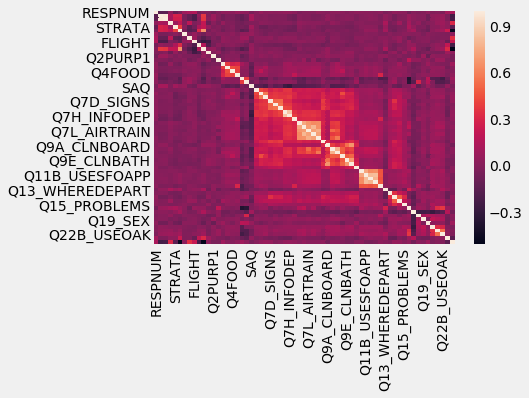

In [57]:
sns.heatmap(customer.corr())

# Chicago Food Inspections Data

In [43]:
# load in the data set
food = pd.read_csv('/Users/divyasusarla/Downloads/Food_Inspections.csv')

In [44]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154657 entries, 0 to 154656
Data columns (total 17 columns):
Inspection ID      154657 non-null int64
DBA Name           154657 non-null object
AKA Name           152113 non-null object
License #          154642 non-null float64
Facility Type      150086 non-null object
Risk               154589 non-null object
Address            154657 non-null object
City               154497 non-null object
State              154648 non-null object
Zip                154559 non-null float64
Inspection Date    154657 non-null object
Inspection Type    154656 non-null object
Results            154657 non-null object
Violations         123679 non-null object
Latitude           154110 non-null float64
Longitude          154110 non-null float64
Location           154110 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 20.1+ MB


In [45]:
food.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2544
License #             15
Facility Type       4571
Risk                  68
Address                0
City                 160
State                  9
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30978
Latitude             547
Longitude            547
Location             547
dtype: int64

In [46]:
food.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2081933,KOME,KOME,2542243.0,Restaurant,Risk 1 (High),1303 S MICHIGAN AVE,CHICAGO,IL,60605.0,09/12/2017,License,Pass,37. TOILET ROOM DOORS SELF CLOSING: DRESSING R...,41.865649,-87.623965,"(41.865648779880125, -87.62396517625166)"
1,1955876,A&T PANCAKE HOUSE,A&T PANCAKE HOUSE,2293343.0,Restaurant,Risk 1 (High),7036 N CLARK ST,CHICAGO,IL,60626.0,09/12/2017,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,42.010124,-87.674370,"(42.01012437485032, -87.67436989898064)"


In [47]:
food['Results'].unique()

array(['Pass', 'Fail', 'Not Ready', 'No Entry', 'Out of Business',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [48]:
food['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan, 'All'], dtype=object)

This dataset is a good example of descriptive data:
Understanding the type of data that we are working with will give us a better idea of what type of ML model to impelement.

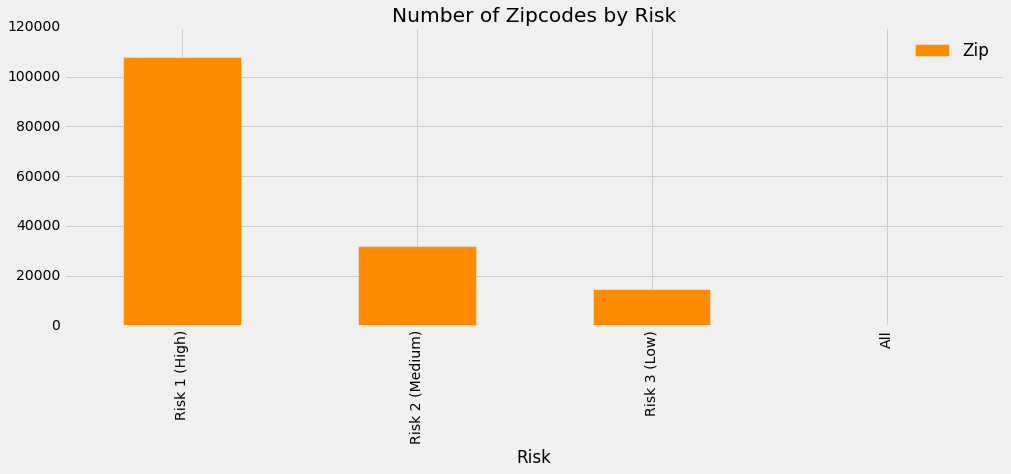

In [54]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Risk')[['Zip']].count().sort_values(
    'Zip', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Number of Zipcodes by Risk')

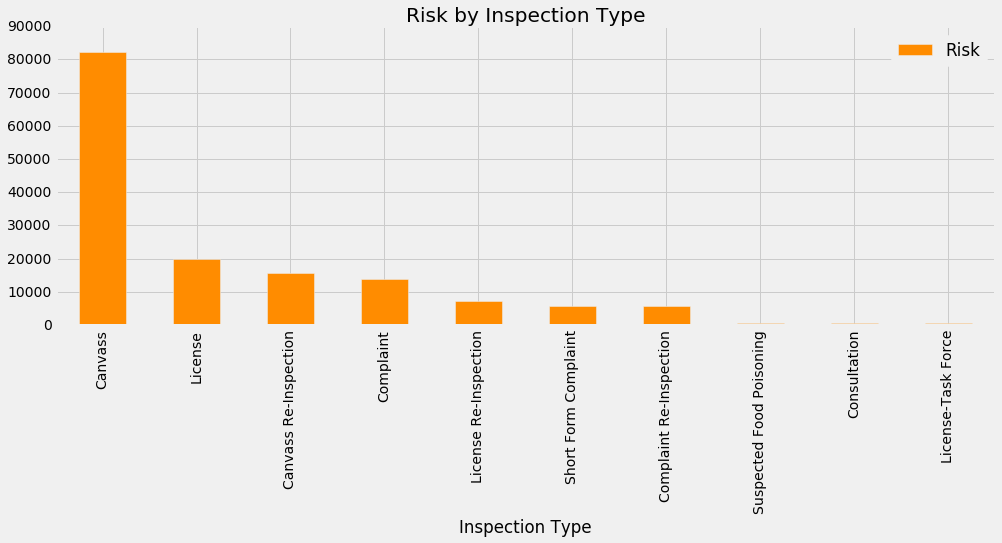

In [66]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

In [67]:
# Clean risk to numeric values

In [68]:
food['Risk'] = food['Risk'].astype(str)

In [75]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').replace('All', '0').replace('nan', '0'))

In [77]:
food['Risk'] = food['Risk'].astype(int)

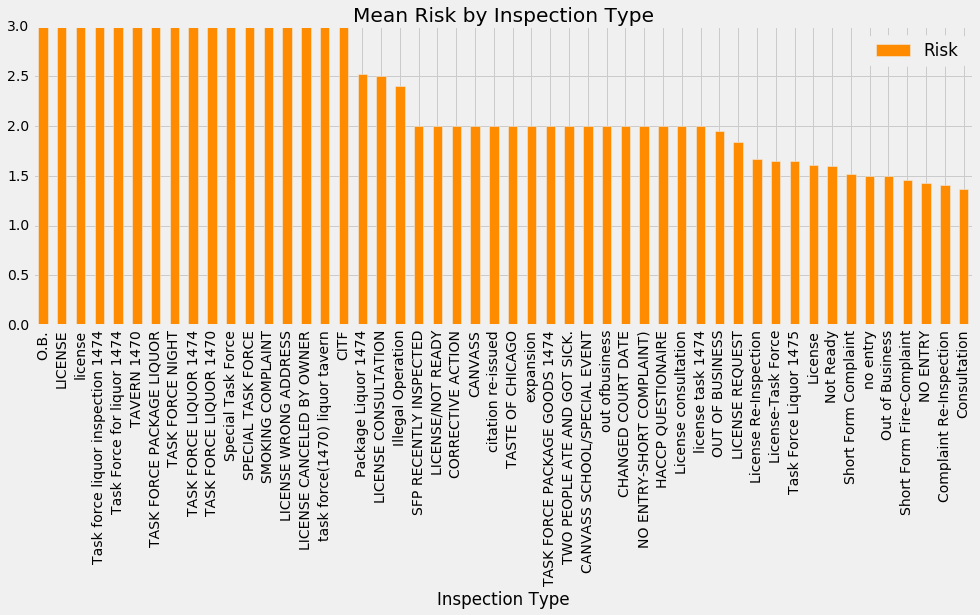

In [84]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].mean().sort_values(
    'Risk', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Mean Risk by Inspection Type')

# Whitehouse Visitor Log Dataset

In [100]:
# load in the data set
whitehouse = pd.read_csv('/Users/divyasusarla/Downloads/whitehouse_waves-2016_12.csv')

In [101]:
whitehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970504 entries, 0 to 970503
Data columns (total 28 columns):
NAMELAST             970494 non-null object
NAMEFIRST            970497 non-null object
NAMEMID              778796 non-null object
UIN                  966303 non-null object
BDGNBR               274058 non-null float64
ACCESS_TYPE          966273 non-null object
TOA                  274052 non-null object
POA                  274043 non-null object
TOD                  162480 non-null object
POD                  94507 non-null object
APPT_MADE_DATE       966282 non-null object
APPT_START_DATE      970504 non-null object
APPT_END_DATE        970504 non-null object
APPT_CANCEL_DATE     18868 non-null object
Total_People         966273 non-null float64
LAST_UPDATEDBY       965309 non-null object
POST                 966273 non-null object
LASTENTRYDATE        966273 non-null object
TERMINAL_SUFFIX      965309 non-null object
visitee_namelast     911249 non-null object
visitee_n

In [102]:
whitehouse.isnull().sum()

NAMELAST                 10
NAMEFIRST                 7
NAMEMID              191708
UIN                    4201
BDGNBR               696446
ACCESS_TYPE            4231
TOA                  696452
POA                  696461
TOD                  808024
POD                  875997
APPT_MADE_DATE         4222
APPT_START_DATE           0
APPT_END_DATE             0
APPT_CANCEL_DATE     951636
Total_People           4231
LAST_UPDATEDBY         5195
POST                   4231
LASTENTRYDATE          4231
TERMINAL_SUFFIX        5195
visitee_namelast      59255
visitee_namefirst      6781
MEETING_LOC            2631
MEETING_ROOM           4232
CALLER_NAME_LAST       4231
CALLER_NAME_FIRST      4231
CALLER_ROOM          970504
DESCRIPTION          360917
Release_Date              0
dtype: int64

In [103]:
whitehouse.dropna(axis=1, inplace=True)

In [105]:
whitehouse.head()

,APPT_START_DATE,APPT_END_DATE,Release_Date
0,10/1/2015 3:00,10/1/2015 23:59,1/29/2016
1,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
2,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
3,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
4,10/1/2015 5:00,9/30/2016 23:59,1/29/2016


In [106]:
whitehouse['APPT_START_DATE'] = pd.to_datetime(whitehouse['APPT_START_DATE'])
whitehouse['APPT_END_DATE'] = pd.to_datetime(whitehouse['APPT_END_DATE'])

In [107]:
whitehouse['APPT_DURATION'] = whitehouse['APPT_END_DATE'] - whitehouse['APPT_START_DATE']

In [108]:
np.mean(whitehouse['APPT_DURATION'])

Timedelta('1 days 03:46:03.909412')

# Climate Change Dataset:

In [13]:
# load in the data set
climate = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [14]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [114]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 8 columns):
dt                               datetime64[ns]
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         float64
Longitude                        float64
year                             int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 885.5+ MB


In [115]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
year                             0
dtype: int64

In [17]:
# remove missing values
climate.dropna(axis=0, inplace=True)

In [18]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [19]:
# remove the "N" and "S" from Latitude
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [20]:
# remove the "W" and "E" from Longitude
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [21]:
# Cast Longitude as a float
climate['Longitude'] = climate['Longitude'].astype(float)

In [22]:
# Cast Latitude as a float
climate['Latitude'] = climate['Latitude'].astype(float)

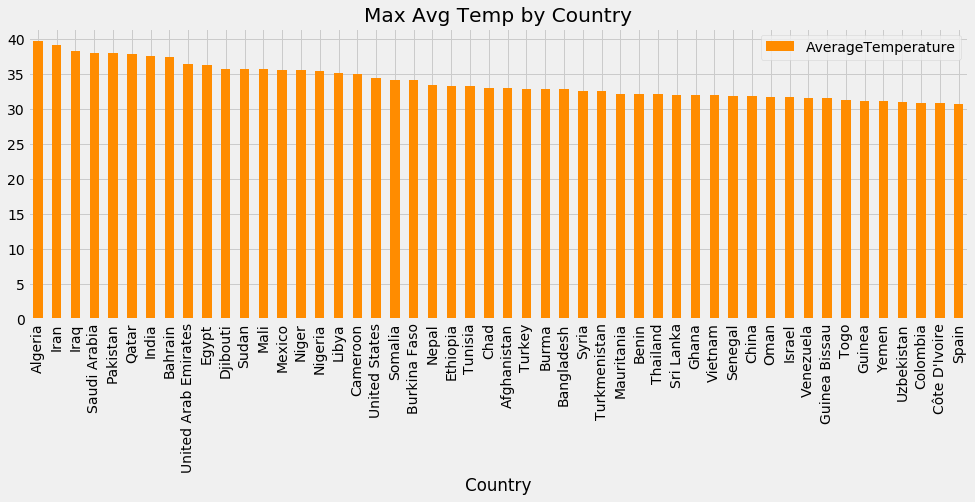

In [116]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [117]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

In [118]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05,10.33,1743
5,1744-04-01 00:00:00,5.788,3.624,Århus,Denmark,57.05,10.33,1744
6,1744-05-01 00:00:00,10.644,1.283,Århus,Denmark,57.05,10.33,1744
7,1744-06-01 00:00:00,14.051,1.347,Århus,Denmark,57.05,10.33,1744
8,1744-07-01 00:00:00,16.082,1.396,Århus,Denmark,57.05,10.33,1744


In [120]:
climate['AverageTemperature'].nunique()

111994

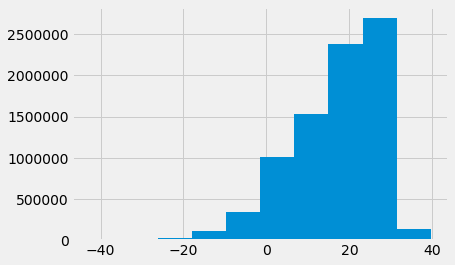

In [128]:
climate['AverageTemperature'].hist()

In [130]:
climate['AverageTemperature'].describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

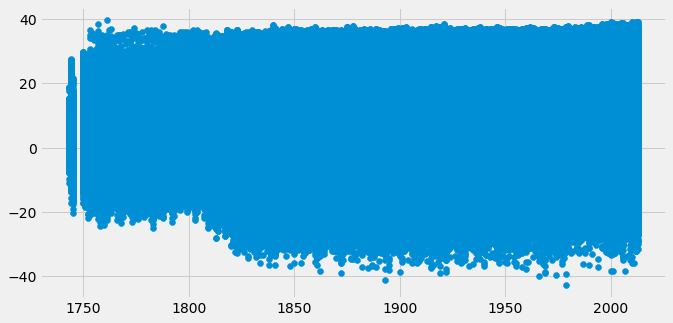

In [121]:
# Raw scatterplot to show average temperatures in the world

x = climate['year']
y = climate['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [131]:
# Oof, how about a subset the data to just the US?
climate_sub_us = climate.loc[climate['Country'] == 'United States']

In [133]:
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: x/100+1)

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136032750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1b5121090>]], dtype=object)

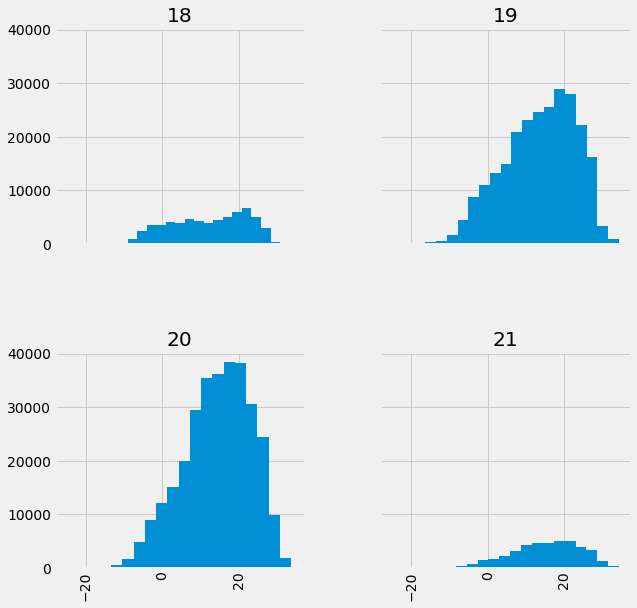

In [146]:
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], 
                                          sharex=True, sharey=True, 
                                          figsize=(10, 10), 
                                          bins=20)

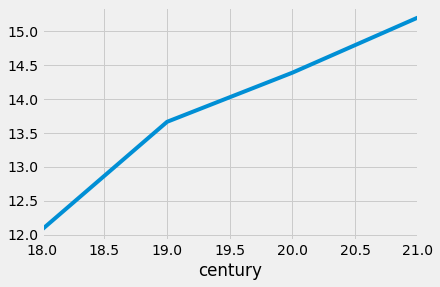

In [149]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [189]:
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

# 21st century average temp in US minus 18th century average temp in US
century_changes[21] - century_changes[18]  

3.1244491154607541

In [190]:
century_changes

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

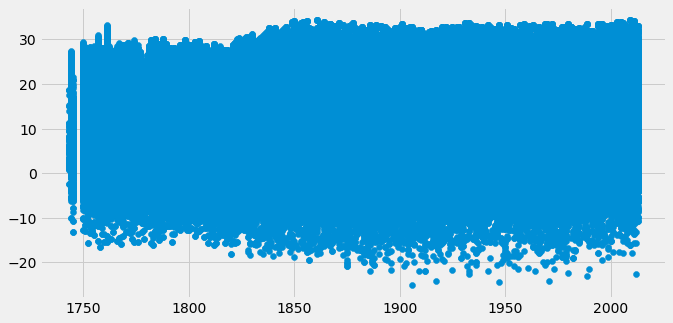

In [29]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

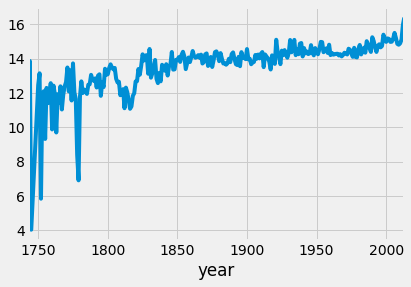

In [192]:
# Not much better, Let's use a groupby to reduce the amount of noise in the US
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

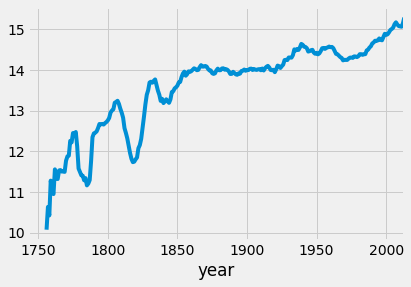

In [196]:
# And a moving average to smooth it all out:
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

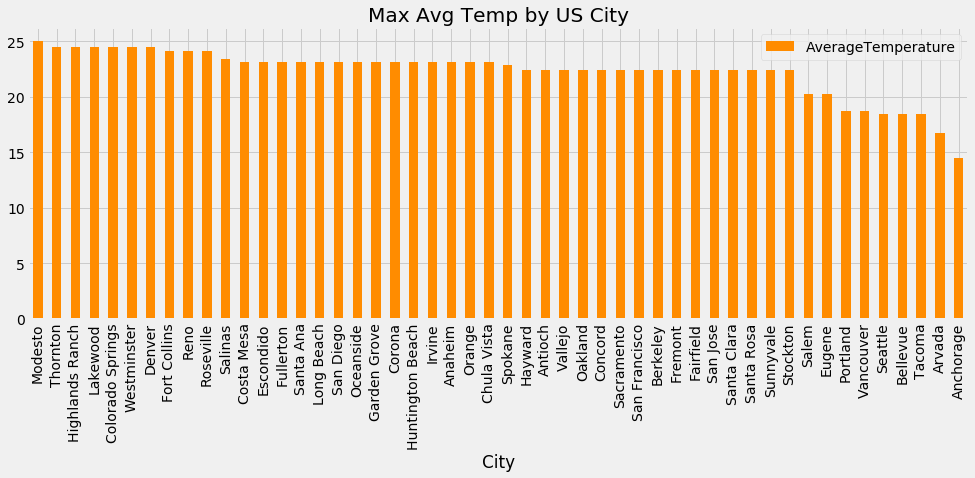

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')